# Nasa Near Earth Object Machine Learning & Data Analysis Project!

In this notebook I will be publishing an analysis/machine learning model for the Nasa Near Earth Object Data Set for the currently unexplored dataset (0 published code as of July 2022)!  

(Link to Dataset: https://www.kaggle.com/datasets/adityaramachandran27/nasa-near-earth-objects-information) 

## Loading Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import missingno as mno
import datawig


In [2]:
data = pd.read_csv('/Users/vishva/Nasa-near-earth.csv')

## Exploratory Data Analysis

In [3]:
data

,Unnamed: 0,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,0,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
1,1,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
2,2,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
3,3,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
4,4,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23995,54073361,54073361,(2020 UQ),NaN,2020 UQ,26.90,False,False,0.011080,0.024777,3,APO,0.608650,1.901363,2020-10-16,2020-10-19,Near-Earth asteroid orbits which cross the Ear...
23996,23996,54073362,54073362,(2020 UR),NaN,2020 UR,27.90,False,False,0.006991,0.015633,4,APO,0.732739,1.887929,2020-10-16,2020-10-19,Near-Earth asteroid orbits which cross the Ear...
23997,23997,54073363,54073363,(2020 US),NaN,2020 US,27.20,False,False,0.009651,0.021579,5,APO,0.788983,2.851299,2020-10-16,2020-10-21,Near-Earth asteroid orbits which cross the Ear...
23998,23998,54073365,54073365,(2020 UT),NaN,2020 UT,27.33,False,False,0.009090,0.020325,2,AMO,1.045124,4.170737,2020-10-15,2020-10-18,Near-Earth asteroid orbits similar to that of ...


In [4]:
data.dtypes

Unnamed: 0                             int64
id                                     int64
neo_reference_id                       int64
name                                  object
name_limited                          object
designation                           object
absolute_magnitude_h                 float64
is_potentially_hazardous_asteroid       bool
is_sentry_object                        bool
kilometers_estimated_diameter_min    float64
kilometers_estimated_diameter_max    float64
orbit_id                              object
orbit_class_type                      object
perihelion_distance                  float64
aphelion_distance                    float64
first_observation_date                object
last_observation_date                 object
orbit_class_description               object
dtype: object

In [5]:
data.columns

Index(['Unnamed: 0', 'id', 'neo_reference_id', 'name', 'name_limited',
       'designation', 'absolute_magnitude_h',
       'is_potentially_hazardous_asteroid', 'is_sentry_object',
       'kilometers_estimated_diameter_min',
       'kilometers_estimated_diameter_max', 'orbit_id', 'orbit_class_type',
       'perihelion_distance', 'aphelion_distance', 'first_observation_date',
       'last_observation_date', 'orbit_class_description'],
      dtype='object')

In [6]:
data.describe()

,Unnamed: 0,id,neo_reference_id,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance
count,24000.000000,2.400000e+04,2.400000e+04,23992.000000,23992.000000,23992.000000,24000.000000,24000.000000
mean,11999.500000,7.275111e+06,7.275111e+06,22.942274,0.167777,0.375160,0.915225,2.653104
std,6928.347566,1.333987e+07,1.333987e+07,2.952871,0.293000,0.655169,0.232201,4.468233
min,0.000000,2.001981e+06,2.001981e+06,12.580000,0.000609,0.001362,0.070431,0.653754
25%,5999.750000,3.409962e+06,3.409962e+06,20.650000,0.024241,0.054205,0.785150,1.706281
50%,11999.500000,3.703790e+06,3.703790e+06,23.200000,0.060891,0.136157,0.965325,2.480109
75%,17999.250000,3.803897e+06,3.803897e+06,25.200000,0.197040,0.440595,1.068984,3.397965
max,23999.000000,5.408749e+07,5.408749e+07,33.200000,8.101305,18.115068,1.299988,631.895456


In [7]:
data.shape

(24000, 18)

Looking at the data, we can see that we are faced with a binary classification problem. 
In this situation, we are looking to see whether or not an asteroid is hazardous based on some variables provided.

However, upon examining the data, it is clear that there are many values that will prove unvaluable when determing the result (if not being detrimental to the models). As such, we will look to drop these columns. 

In [8]:
data = data.drop('Unnamed: 0',axis = 1)
data = data.drop('first_observation_date',axis = 1)
data = data.drop('last_observation_date',axis = 1)
data = data.drop('neo_reference_id', axis = 1)
data = data.drop('name_limited', axis = 1)
data = data.drop('name', axis = 1)
data = data.drop('designation', axis = 1)
data = data.drop('orbit_id', axis = 1)

In [9]:
data

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,orbit_class_description
0,2001981,15.22,True,False,2.401900,5.370812,APO,0.621512,2.931360,Near-Earth asteroid orbits which cross the Ear...
1,2002059,15.97,False,False,1.700415,3.802244,AMO,1.238537,4.047945,Near-Earth asteroid orbits similar to that of ...
2,2002061,16.36,False,False,1.420872,3.177167,AMO,1.050403,3.478155,Near-Earth asteroid orbits similar to that of ...
3,2002062,17.10,False,False,1.010543,2.259644,ATE,0.790185,1.143633,Near-Earth asteroid orbits similar to that of ...
4,2002063,17.28,False,False,0.930154,2.079888,APO,0.701397,1.454804,Near-Earth asteroid orbits which cross the Ear...
...,...,...,...,...,...,...,...,...,...,...
23995,54073361,26.90,False,False,0.011080,0.024777,APO,0.608650,1.901363,Near-Earth asteroid orbits which cross the Ear...
23996,54073362,27.90,False,False,0.006991,0.015633,APO,0.732739,1.887929,Near-Earth asteroid orbits which cross the Ear...
23997,54073363,27.20,False,False,0.009651,0.021579,APO,0.788983,2.851299,Near-Earth asteroid orbits which cross the Ear...
23998,54073365,27.33,False,False,0.009090,0.020325,AMO,1.045124,4.170737,Near-Earth asteroid orbits similar to that of ...


Now that we have eliminated some of the irrelevant datapoints in our DataFrame, we can look to create visualizations of our data to recognize any major patterns.

## Visualizations

In [10]:
dataNums = data[['id','absolute_magnitude_h','kilometers_estimated_diameter_min',
            'kilometers_estimated_diameter_max', 'perihelion_distance', 'aphelion_distance']]

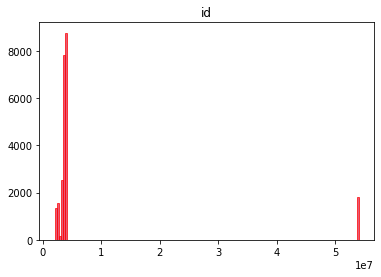

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


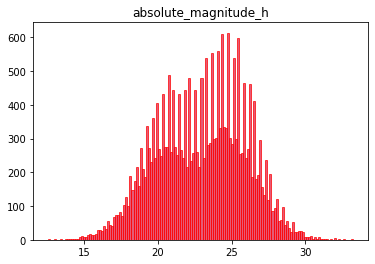

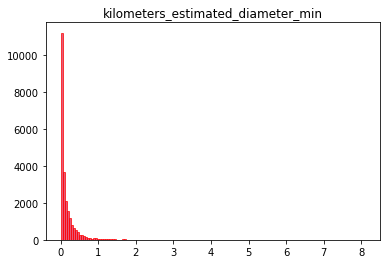

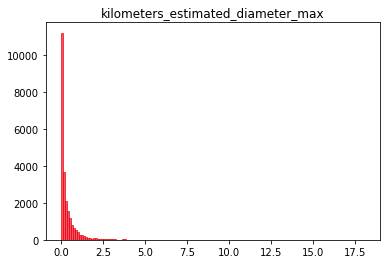

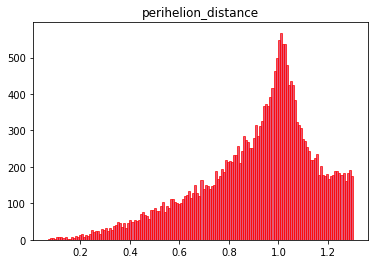

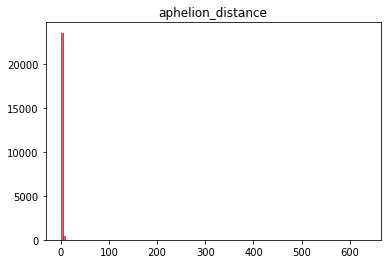

In [11]:
for i in dataNums.columns:
    plt.hist(data[i], bins=150, facecolor='crimson', edgecolor='red', linewidth=1, alpha=0.7)
    plt.title(i)
    plt.show()

The histogram of the id is irrelavent but the graphs for the other valuables highlight some interesting insights. For instance, we can tell that the kilometers_estimated_diameter_max and kilometers_estimated_diameter_min graphs appear to have the same general positively skewed distribution. They also appear to have the same relative heights within the bins of the histogram. The graph of the absolute magnitue has a relatively normal distribution while the perihelion distance is negatively skewed. The aphelion distance, on the other hand, is concentrated in a single point (not too much variance).  

2022-08-04 06:34:41,552 [INFO]  NumExpr defaulting to 8 threads.


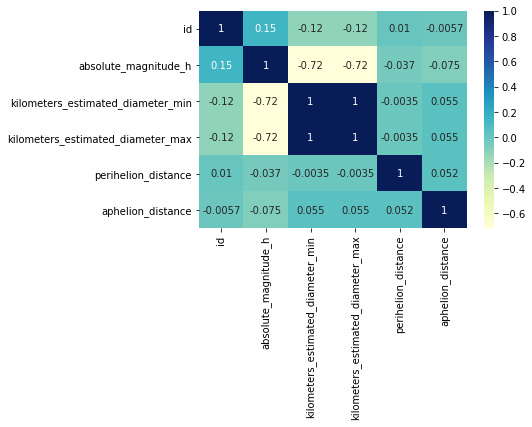

In [12]:
sns.heatmap(dataNums.corr(),cmap = "YlGnBu",annot = True)

Unsurprisingly, from our predictions after viewing the histograms, the kilometers_estimated_diameter_min and kilometers_estimated_diameter_max are highly corelated with one another. With regards to the rest of the dataset, there does not appear to be a high level of correlation as each columns seems to have a correlation value of less than .15 with other columns.

## Data Preprocessing/Cleaning

'Is the Asteroid Potentially Hazardous'

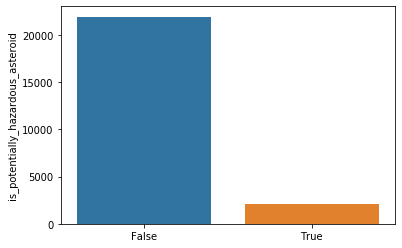

In [13]:
sns.barplot(data['is_potentially_hazardous_asteroid'].value_counts().index,data
            ['is_potentially_hazardous_asteroid'].value_counts()).set_title
('Is the Asteroid Potentially Hazardous')

In [14]:
data['is_potentially_hazardous_asteroid'].value_counts()

False    21906
True      2094
Name: is_potentially_hazardous_asteroid, dtype: int64

From these two graphs, it is clear that our data is wildly unbalanced as we have many more False classifications than true ones. This makes sense because of the fact that most asteroids arent indeed dangerous (thankfully) and we have lived many years since the last major extinction. However, to solve this problem, we will either have to upsample or downsample the data in order to allow the model to more accurately give a prediction for our data. After all, if the model simply returned false for all of our data points, it would have around a 91-92% accuracy rate (even when this is an incorrect method of approaching the problem).

Text(0.5, 1.0, 'Is the Asteroid a Sentry Obj')

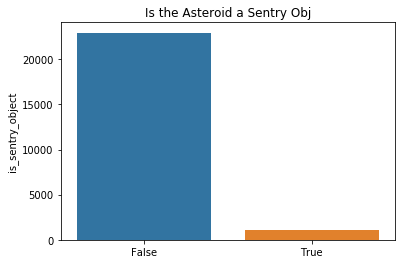

In [15]:
sns.barplot(data['is_sentry_object'].value_counts().index,data
            ['is_sentry_object'].value_counts()).set_title('Is the Asteroid a Sentry Obj')

In [16]:
data["is_sentry_object"] = data["is_sentry_object"].astype(int)
data["is_potentially_hazardous_asteroid"] = data["is_potentially_hazardous_asteroid"].astype(int)

In [17]:
data

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,orbit_class_description
0,2001981,15.22,1,0,2.401900,5.370812,APO,0.621512,2.931360,Near-Earth asteroid orbits which cross the Ear...
1,2002059,15.97,0,0,1.700415,3.802244,AMO,1.238537,4.047945,Near-Earth asteroid orbits similar to that of ...
2,2002061,16.36,0,0,1.420872,3.177167,AMO,1.050403,3.478155,Near-Earth asteroid orbits similar to that of ...
3,2002062,17.10,0,0,1.010543,2.259644,ATE,0.790185,1.143633,Near-Earth asteroid orbits similar to that of ...
4,2002063,17.28,0,0,0.930154,2.079888,APO,0.701397,1.454804,Near-Earth asteroid orbits which cross the Ear...
...,...,...,...,...,...,...,...,...,...,...
23995,54073361,26.90,0,0,0.011080,0.024777,APO,0.608650,1.901363,Near-Earth asteroid orbits which cross the Ear...
23996,54073362,27.90,0,0,0.006991,0.015633,APO,0.732739,1.887929,Near-Earth asteroid orbits which cross the Ear...
23997,54073363,27.20,0,0,0.009651,0.021579,APO,0.788983,2.851299,Near-Earth asteroid orbits which cross the Ear...
23998,54073365,27.33,0,0,0.009090,0.020325,AMO,1.045124,4.170737,Near-Earth asteroid orbits similar to that of ...


In [18]:
dataT = data[(data['is_potentially_hazardous_asteroid']==0)] 
dataL = data[(data['is_potentially_hazardous_asteroid']==1)] 
dataLN = resample(dataL,replace=True, n_samples= 21906,random_state=42) 
data = pd.concat([dataLN, dataT])

'Is the Asteroid Potentially Hazardous'

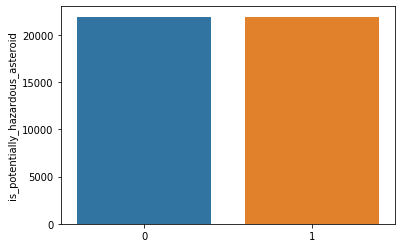

In [19]:
sns.barplot(data['is_potentially_hazardous_asteroid'].value_counts().index,data
            ['is_potentially_hazardous_asteroid'].value_counts()).set_title
('Is the Asteroid Potentially Hazardous')

And with that, we have upsampled our data and made it so that our data is balanced and so that our model can better predict the final result. Now, we are going to deal with our categorical data:

In [20]:
le = LabelEncoder()
data.orbit_class_type = le.fit_transform(data.orbit_class_type)
data

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,orbit_class_description
3563,3117435,20.00,1,0,0.265800,0.594347,1,0.231703,3.967240,Near-Earth asteroid orbits which cross the Ear...
8293,3574100,21.00,1,0,0.167708,0.375008,1,0.921852,2.388918,Near-Earth asteroid orbits which cross the Ear...
6091,3423024,22.00,1,0,0.105817,0.236614,1,0.687494,2.032256,Near-Earth asteroid orbits which cross the Ear...
5710,3397572,21.00,1,0,0.167708,0.375008,1,0.779012,3.317244,Near-Earth asteroid orbits which cross the Ear...
13753,3742342,21.40,1,0,0.139494,0.311918,2,0.275605,1.183678,Near-Earth asteroid orbits similar to that of ...
...,...,...,...,...,...,...,...,...,...,...
23995,54073361,26.90,0,0,0.011080,0.024777,1,0.608650,1.901363,Near-Earth asteroid orbits which cross the Ear...
23996,54073362,27.90,0,0,0.006991,0.015633,1,0.732739,1.887929,Near-Earth asteroid orbits which cross the Ear...
23997,54073363,27.20,0,0,0.009651,0.021579,1,0.788983,2.851299,Near-Earth asteroid orbits which cross the Ear...
23998,54073365,27.33,0,0,0.009090,0.020325,0,1.045124,4.170737,Near-Earth asteroid orbits similar to that of ...


In [21]:
le = LabelEncoder()
data.orbit_class_description = le.fit_transform(data.orbit_class_description)
data

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,orbit_class_description
3563,3117435,20.00,1,0,0.265800,0.594347,1,0.231703,3.967240,3
8293,3574100,21.00,1,0,0.167708,0.375008,1,0.921852,2.388918,3
6091,3423024,22.00,1,0,0.105817,0.236614,1,0.687494,2.032256,3
5710,3397572,21.00,1,0,0.167708,0.375008,1,0.779012,3.317244,3
13753,3742342,21.40,1,0,0.139494,0.311918,2,0.275605,1.183678,2
...,...,...,...,...,...,...,...,...,...,...
23995,54073361,26.90,0,0,0.011080,0.024777,1,0.608650,1.901363,3
23996,54073362,27.90,0,0,0.006991,0.015633,1,0.732739,1.887929,3
23997,54073363,27.20,0,0,0.009651,0.021579,1,0.788983,2.851299,3
23998,54073365,27.33,0,0,0.009090,0.020325,0,1.045124,4.170737,1


Text(0.5, 1.0, 'orbit_class_type')

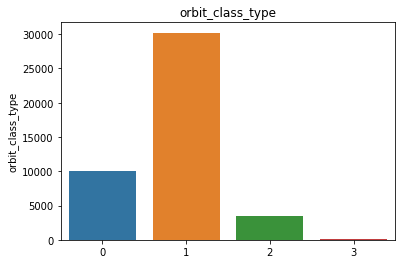

In [22]:
sns.barplot(data['orbit_class_type'].value_counts().index,data['orbit_class_type'].value_counts()).set_title('orbit_class_type')


Text(0.5, 1.0, 'orbit_class_description')

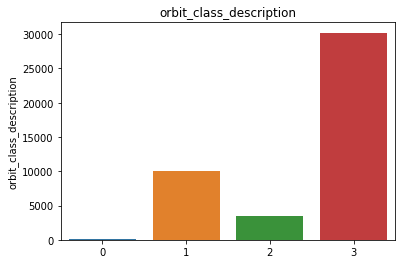

In [23]:
sns.barplot(data['orbit_class_description'].value_counts().index,data['orbit_class_description'].value_counts()
           ).set_title('orbit_class_description')


In [24]:
pd.pivot_table(data, index = 'is_potentially_hazardous_asteroid', values = ['aphelion_distance',
                                                                            'perihelion_distance',
                                                                            'orbit_class_type',
                                                                            'orbit_class_description',
                                                                           'kilometers_estimated_diameter_max',
                                                                           'kilometers_estimated_diameter_min'])

,aphelion_distance,kilometers_estimated_diameter_max,kilometers_estimated_diameter_min,orbit_class_description,orbit_class_type,perihelion_distance
is_potentially_hazardous_asteroid,,,,,,
0,2.639363,0.339707,0.151922,2.119374,0.674336,0.930043
1,2.813751,0.740424,0.331128,2.794120,1.035378,0.759969


The above two instances of label encoder served to transform some of our categorical data variables into integers for our model to function properly. Both orbit type and the class descriptions had about 3 different categories so the use of the package was not functionally expensive. Now, we have to deal with null values:

In [25]:
data.isnull().sum(axis = 0)

id                                    0
absolute_magnitude_h                  8
is_potentially_hazardous_asteroid     0
is_sentry_object                      0
kilometers_estimated_diameter_min    13
kilometers_estimated_diameter_max    13
orbit_class_type                      0
perihelion_distance                   0
aphelion_distance                     0
orbit_class_description               0
dtype: int64

In [26]:
 data.loc[data['kilometers_estimated_diameter_min'].isnull()]

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,orbit_class_description
7398,3536555,20.70,1,0,NaN,NaN,1,0.807641,2.704371,3
7398,3536555,20.70,1,0,NaN,NaN,1,0.807641,2.704371,3
7398,3536555,20.70,1,0,NaN,NaN,1,0.807641,2.704371,3
7398,3536555,20.70,1,0,NaN,NaN,1,0.807641,2.704371,3
7398,3536555,20.70,1,0,NaN,NaN,1,0.807641,2.704371,3
7398,3536555,20.70,1,0,NaN,NaN,1,0.807641,2.704371,3
7098,3486442,22.01,0,0,NaN,NaN,2,0.499066,1.308927,2
7099,3486468,24.50,0,0,NaN,NaN,1,0.992934,3.807938,3
7297,3521512,22.50,0,0,NaN,NaN,1,0.972326,3.523808,3
7298,3520758,23.60,0,0,NaN,NaN,2,0.560438,1.041743,2


In [27]:
 data.loc[data['absolute_magnitude_h'].isnull()]

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,orbit_class_description
7092,3592397,NaN,0,0,0.096506,0.215794,0,1.030625,1.833895,1
7093,3529628,NaN,0,0,0.242412,0.542051,0,1.296142,1.585558,1
7280,3593352,NaN,0,0,0.242412,0.542051,0,1.283669,2.252321,1
7292,3593534,NaN,0,0,0.237988,0.532157,0,1.124254,1.633350,1
7295,3593636,NaN,0,0,0.050647,0.113250,0,1.248248,1.606883,1
7396,3594572,NaN,0,0,0.552783,1.236061,0,1.288272,1.780744,1
7399,3536587,NaN,0,0,NaN,NaN,1,0.809472,1.333837,3
7400,3536588,NaN,0,0,0.110295,0.246627,1,0.587842,1.866107,3


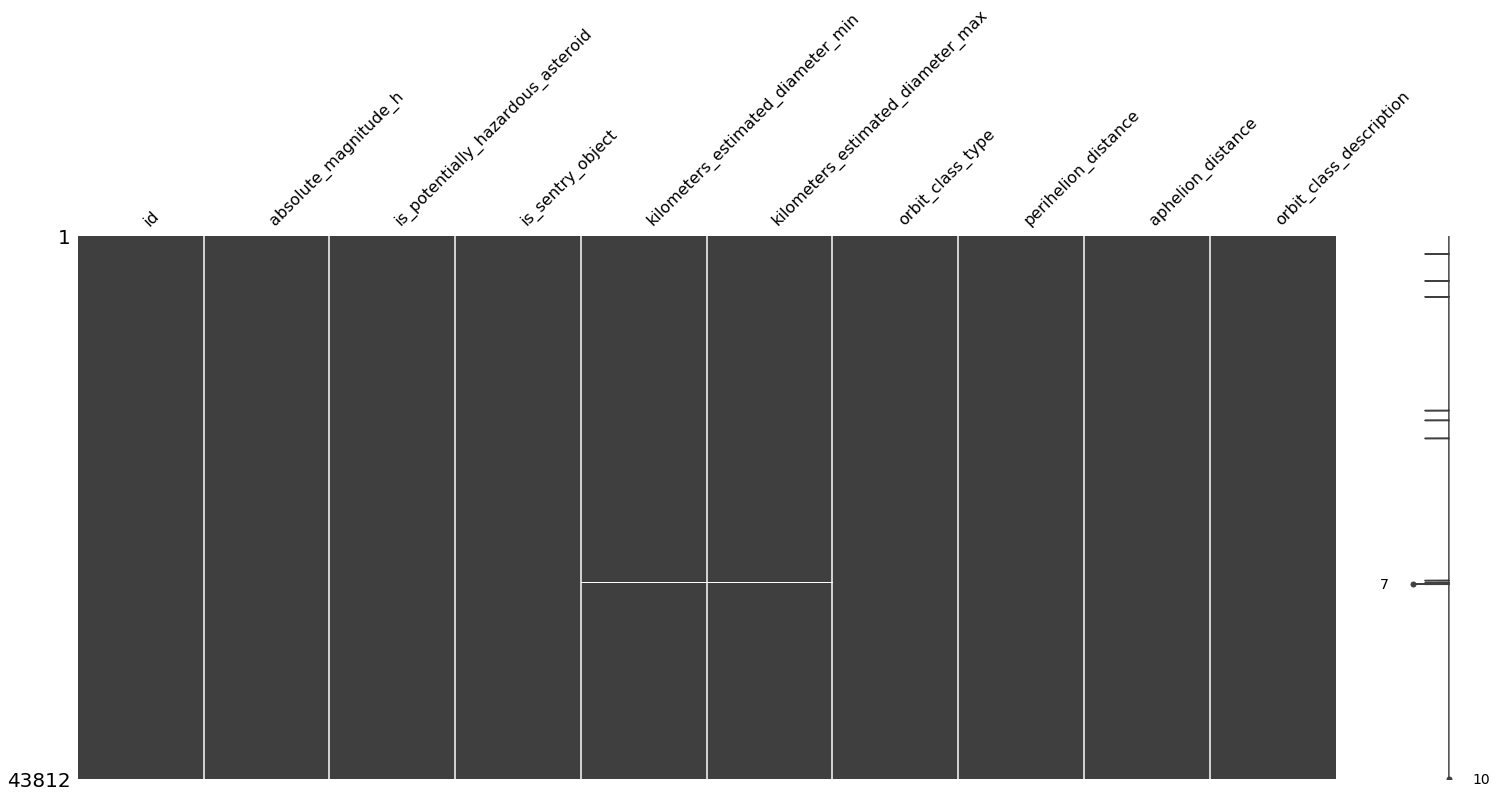

In [28]:
mno.matrix(data)

From this, we are able to see that not only is the missing data clumped together within relativelt the same index frame, we can see that the data missing the 'kilometers_estimated_diameter_min' tends to also be missing the 'kilometers_estimated_diameter_max.' In order to impute this data that appears to have some relationship with their ***neighbors*** , I will use the K-Nearest Neighbor (KNN) imputing model.

In [29]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data.head()

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,orbit_class_description
0,0.021416,0.359845,1.0,0.0,0.032737,0.032737,0.333333,0.131162,0.005249,1.000000
1,0.030183,0.408341,1.0,0.0,0.020628,0.020628,0.333333,0.692462,0.002749,1.000000
2,0.027283,0.456838,1.0,0.0,0.012988,0.012988,0.333333,0.501858,0.002184,1.000000
3,0.026794,0.408341,1.0,0.0,0.020628,0.020628,0.333333,0.576290,0.004219,1.000000
4,0.033414,0.427740,1.0,0.0,0.017145,0.017145,0.666667,0.166868,0.000839,0.666667


However, before we are able to beging using the KNN imputer, we ought to use the min/max scaler to ensure that the data is fit to a smaller range between 0 and 1 (the imputer works by using distance between data around it). 

In [30]:
imputer = KNNImputer(n_neighbors=10)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [31]:
data.isnull().sum(axis = 0)

id                                   0
absolute_magnitude_h                 0
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    0
kilometers_estimated_diameter_max    0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
orbit_class_description              0
dtype: int64

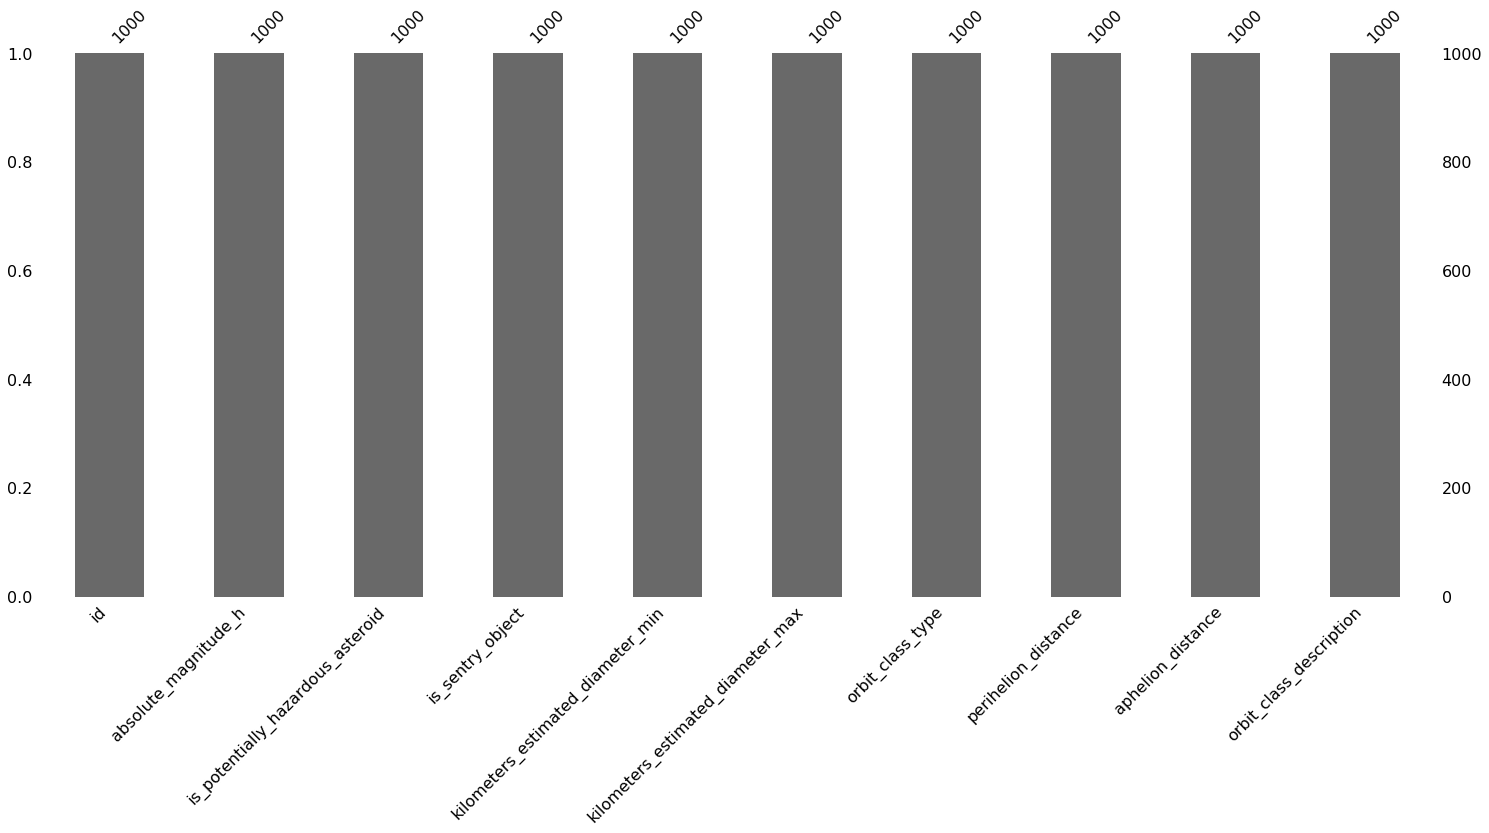

In [32]:
mno.bar(data.sample(1000))

We have now addressed the missing data problem! :D

## Model Building/Evaluation

In [33]:
X = data.drop('is_potentially_hazardous_asteroid', axis = 1)
y = data['is_potentially_hazardous_asteroid']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

With this, we have split our dataset into our train and test data which will soon be evaluated :o.

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35049, 9) (8763, 9) (35049,) (8763,)


In [36]:
X_train.head()

,id,absolute_magnitude_h,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,orbit_class_description
27099,0.027630,0.539282,0.0,0.005896,0.005896,0.333333,0.647588,0.004095,1.000000
32956,0.032974,0.474782,0.0,0.010941,0.010941,0.333333,0.682928,0.001031,1.000000
13938,0.030791,0.374394,0.0,0.028503,0.028503,0.333333,0.745020,0.005093,1.000000
37513,0.034471,0.403492,0.0,0.021604,0.021604,0.000000,0.938961,0.001340,0.333333
40128,0.035339,0.442289,0.0,0.014923,0.014923,0.000000,0.830928,0.003627,0.333333


In [37]:
X_train.columns

Index(['id', 'absolute_magnitude_h', 'is_sentry_object',
       'kilometers_estimated_diameter_min',
       'kilometers_estimated_diameter_max', 'orbit_class_type',
       'perihelion_distance', 'aphelion_distance', 'orbit_class_description'],
      dtype='object')

In [38]:
scaler = StandardScaler()

In [39]:
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.fit_transform(X_test)

Before we are able to use our models, standard scaler is used in order to, as the name suggests, standardize the data. This means that we are removing the mean and scaling our data to unit variance (variance of 1). This standardization is necessary for many machine learning models to work optimally (like the Logistic Regression and our favorite KNN model that we will soon be using...)

In [40]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv.mean())

0.8870723579567252


In [41]:
rf = RandomForestClassifier(random_state = 100)
cv = cross_val_score(rf,X_trainScaled,y_train,cv=5)
print(cv.mean())

0.9599417174861177


In [42]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_trainScaled,y_train,cv=5)
print(cv.mean())

0.8240181311617079


In [43]:
linR = LinearRegression()
cv = cross_val_score(linR,X_trainScaled,y_train,cv=5)
print(cv.mean())

0.4964632756038142


Unsurprisingly linear regression was ineffective in this binary classification problem as we are essentially looking for a line of best fit within our data. As such, it is highly impacted by outliers in our data. Logistic regression is much more preferrable as it uses the sigmoid function to limit the effect of the outliers. Further, linear regression uses a continuous set of values to predict(the linear fit graph) while the logistic regression uses discerete values (were specific results mandate specific condtions).

In [44]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv.mean())

0.9308110684672997


The best model we were able to aquire was the Random Forest Classifer with an accuracy of about 96%.

# Thank you so much for reading through my first ML notebook and I hope you enjoyed!

References: https://www.kaggle.com/code/kenjee/titanic-project-example